In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
import os

In [204]:
import cv2

In [205]:
import keras

In [206]:
import pickle

In [207]:
DATADIR="C:/Users/MOHIT CHVK/Desktop/new trash/dataset/training_set"
CATEGORIES=["dogs","cats"]

In [208]:
IMG_SIZE=72

In [209]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [210]:
print(len(training_data))

8000


In [211]:
import random
random.shuffle(training_data)

In [212]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
1
0
1
0
0
1


In [213]:
X=[]
y=[]

In [214]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [215]:
x=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [216]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

In [217]:
pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [218]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [219]:
X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))

In [220]:
X=X/255.0

In [221]:
X[1]

array([[[0.82352941],
        [0.82352941],
        [0.82745098],
        ...,
        [0.05490196],
        [0.11764706],
        [0.13333333]],

       [[0.83529412],
        [0.83529412],
        [0.82745098],
        ...,
        [0.0627451 ],
        [0.09803922],
        [0.09411765]],

       [[0.83921569],
        [0.83921569],
        [0.84313725],
        ...,
        [0.09019608],
        [0.09803922],
        [0.12941176]],

       ...,

       [[0.74901961],
        [0.74509804],
        [0.77254902],
        ...,
        [0.13333333],
        [0.13333333],
        [0.13333333]],

       [[0.7372549 ],
        [0.74901961],
        [0.75686275],
        ...,
        [0.13333333],
        [0.1254902 ],
        [0.1254902 ]],

       [[0.58823529],
        [0.75294118],
        [0.75294118],
        ...,
        [0.12156863],
        [0.12156863],
        [0.1254902 ]]])

In [222]:
X.shape

(8000, 72, 72, 1)

In [223]:
model=Sequential()

In [224]:
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))    

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2))) 
          
model.add(Flatten())

model.add(Dense(64))

model.add(Dense(1)) 
model.add(Activation("sigmoid"))         

In [225]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [226]:
model.fit(X,y,batch_size=32,epochs=10,validation_split=0.1)

Train on 7200 samples, validate on 800 samples
Epoch 1/10
7200/7200 [==============================] - 5s 724us/sample - loss: 0.6737 - acc: 0.5869 - val_loss: 0.6482 - val_acc: 0.6237
Epoch 2/10
7200/7200 [==============================] - 5s 641us/sample - loss: 0.6070 - acc: 0.6747 - val_loss: 0.5909 - val_acc: 0.7063
Epoch 3/10
7200/7200 [==============================] - 5s 651us/sample - loss: 0.5511 - acc: 0.7249 - val_loss: 0.5725 - val_acc: 0.6913
Epoch 4/10
7200/7200 [==============================] - 5s 644us/sample - loss: 0.5190 - acc: 0.7449 - val_loss: 0.5672 - val_acc: 0.7000
Epoch 5/10
7200/7200 [==============================] - 5s 645us/sample - loss: 0.4799 - acc: 0.7733 - val_loss: 0.5541 - val_acc: 0.7175
Epoch 6/10
7200/7200 [==============================] - 5s 645us/sample - loss: 0.4449 - acc: 0.7935 - val_loss: 0.5532 - val_acc: 0.7050
Epoch 7/10
7200/7200 [==============================] - 5s 652us/sample - loss: 0.4125 - acc: 0.8096 - val_loss: 0.5553 - val

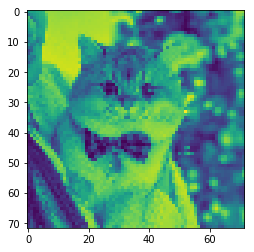

In [236]:
def image(filepath):
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array
plt.imshow(image('C:/Users/MOHIT CHVK/Desktop/new trash/maplechristmas.jpg'))

In [232]:
def prepare(filepath):
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [235]:
prediction=model.predict([prepare('C:/Users/MOHIT CHVK/Desktop/new trash/maplechristmas.jpg')])
print(CATEGORIES[int(prediction[0][0])])

cats


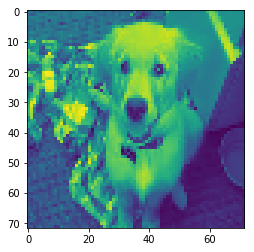

In [238]:
plt.imshow(image('C:/Users/MOHIT CHVK/Desktop/new trash/buddy.jpg'))

In [241]:
prediction=model.predict([prepare('C:/Users/MOHIT CHVK/Desktop/new trash/buddy.jpg')])
print("it is a category of "+CATEGORIES[int(prediction[0][0])])

it is a category of dogs


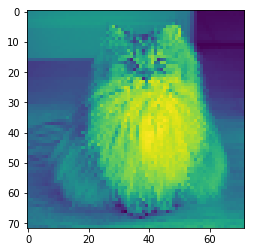

In [242]:
plt.imshow(image('C:/Users/MOHIT CHVK/Desktop/new trash/longhair.jpg'))

In [243]:
prediction=model.predict([prepare('C:/Users/MOHIT CHVK/Desktop/new trash/longhair.jpg')])
print("it is a category of "+CATEGORIES[int(prediction[0][0])])

it is a category of cats


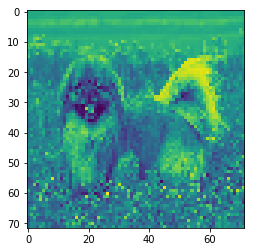

In [244]:
plt.imshow(image('C:/Users/MOHIT CHVK/Desktop/new trash/new.jpg'))

In [245]:
prediction=model.predict([prepare('C:/Users/MOHIT CHVK/Desktop/new trash/new.jpg')])
print("it is a category of "+CATEGORIES[int(prediction[0][0])])

it is a category of dogs
